In [2]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('S_NS_setpoints.csv',encoding='latin1')
data = pd.read_csv('MG_Hourly_data.csv',encoding='latin1')

C:\Users\sjsha\AppData\Local\Temp/ipykernel_8044/3335539508.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1,rotation=90)


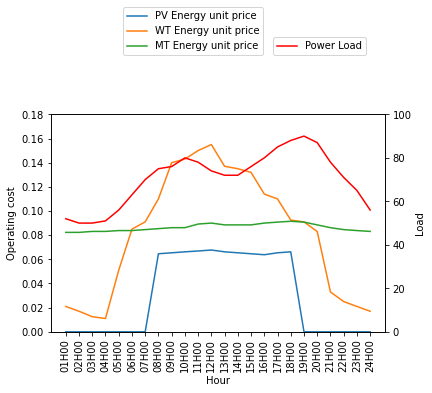

In [3]:
# Fig 2: The power load and the day profile cost per unit of distributed generators (PV, WT and MT)
x1 = data['Hour']
y1 = data['PV_cost']
y2 = data['WT_cost']
y3 = data['MT_cost']
y5 = data['Pload']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, y1, '-', label="PV Energy unit price")
ax.plot(x1, y2, '-', label="WT Energy unit price")
ax.plot(x1, y3, '-', label="MT Energy unit price")

ax2 = ax.twinx()
ax2.plot(x1,y5, '-r', label="Power Load")

ax.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower right')
ax2.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower left')

ax.set_xticklabels(x1,rotation=90)

ax.set_xlabel("Hour")
ax.set_ylabel(r"Operating cost")
ax2.set_ylabel(r"Load")
 
ax.set_ylim(0, 0.18)
ax2.set_ylim(0, 100)
plt.show()

In [4]:
#PV,WT,MT

def obj_func():
    dataset = pd.read_csv('MG_Hourly_data.csv',encoding='latin1')
    MT_Pmax = 30
    nsum=0
    sum=0
    Ui = 1
    l=[]
    peak = ["09H00","10H00","11H00","12H00","13H00","14H00","15H00","16H00","17H00"]
    for j in range(24):
        for i in range(1):
            if dataset['Hour'][j] in peak:
                Ui = 1
                sum1 = (Ui * dataset['PV_Pmax'][j] * dataset['PV_cost'][j]) 
                sum2 = (Ui * dataset['WT_Pmax'][j] * dataset['WT_cost'][j]) 
                sum3 = (Ui * dataset['MT_cost'][j] *  MT_Pmax)
            else:
                sum1 = 0
                sum2 = (Ui * dataset['WT_Pmax'][j] * dataset['WT_cost'][j]) 
                sum3 = (Ui * dataset['MT_cost'][j] *  MT_Pmax) 
            sum = sum1 + sum2 + sum3
        nsum +=  sum #operating cost
        l.append(sum)
    return l

In [5]:
data = pd.read_csv("MG_Hourly_data.csv")
data['Op_cost'] = obj_func()
data['Op_cost']=round((data['Op_cost']/100),4)

C:\Users\sjsha\AppData\Local\Temp/ipykernel_8044/1441520715.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1,rotation=90)


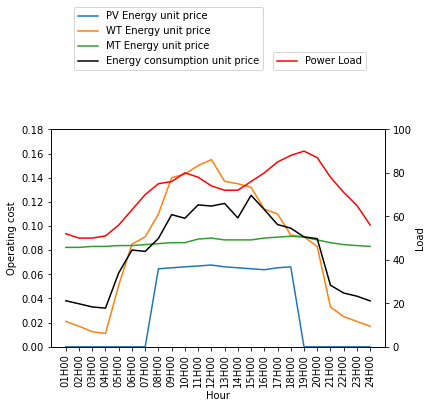

In [6]:
# Fig 3: The estimated operating cost, power load and the day profile costs per unit of distributed generators (PV, WT, MT)

x1 = data['Hour']
y1 = data['PV_cost']
y2 = data['WT_cost']
y3 = data['MT_cost']
y4 = data['Op_cost']
y5 = data['Pload']

fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(x1, y1, '-', label="PV Energy unit price")
ax.plot(x1, y2, '-', label="WT Energy unit price")
ax.plot(x1, y3, '-', label="MT Energy unit price")
ax.plot(x1, y4, '-', label="Energy consumption unit price",color="black")

ax2 = ax.twinx()
ax2.plot(x1,y5, '-r', label="Power Load")

ax.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower right')
ax2.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower left')

ax.set_xticklabels(x1,rotation=90)

ax.set_xlabel("Hour")
ax.set_ylabel(r"Operating cost")
ax2.set_ylabel(r"Load")

ax.set_ylim(0, 0.18)
ax2.set_ylim(0, 100)

plt.show()

In [7]:
#WT,MT without PV

def obj_func():
    dataset = pd.read_csv('MG_Hourly_data.csv',encoding='latin1')
    MT_Pmax = 30
    nsum=0
    sum=0
    Ui = 1
    l=[]
    peak = ["09H00","10H00","11H00","12H00","13H00","14H00","15H00","16H00","17H00"]
    for j in range(24):
        for i in range(1):
            if dataset['Hour'][j] in peak:
                Ui = 1
                sum2 = (Ui * dataset['WT_Pmax'][j] * dataset['WT_cost'][j]) 
                sum3 = (Ui * dataset['MT_cost'][j] *  MT_Pmax)
                sum1=0
            else:
                sum1 = 0
                sum2 = (Ui * dataset['WT_Pmax'][j] * dataset['WT_cost'][j]) 
                sum3 = (Ui * dataset['MT_cost'][j] *  MT_Pmax) 
            sum = sum1 + sum2 + sum3
        nsum +=  sum #operating cost
        l.append(sum)
    return l

In [8]:

data = pd.read_csv("MG_Hourly_data.csv")
data['Op_cost'] = obj_func()
data['Op_cost']=round((data['Op_cost']/100),4)

C:\Users\sjsha\AppData\Local\Temp/ipykernel_8044/2413400406.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1,rotation=90)


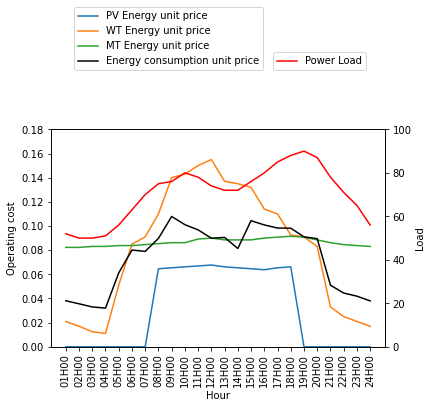

In [9]:
# Fig 4: The estimated operating cost, power load and the day profile costs per unit of distributed generators (WT and MT) without PV

x1 = data['Hour']
y1 = data['PV_cost']
y2 = data['WT_cost']
y3 = data['MT_cost']
y4 = data['Op_cost']
y5 = data['Pload']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, y1, '-', label="PV Energy unit price")
ax.plot(x1, y2, '-', label="WT Energy unit price")
ax.plot(x1, y3, '-', label="MT Energy unit price")
ax.plot(x1, y4, '-', label="Energy consumption unit price",color="black")

ax2 = ax.twinx()
ax2.plot(x1,y5, '-r', label="Power Load")

ax.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower right')
ax2.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower left')

ax.set_xticklabels(x1,rotation=90)
ax.set_xlabel("Hour")
ax.set_ylabel(r"Operating cost")
ax2.set_ylabel(r"Load")

ax.set_ylim(0, 0.18)
ax2.set_ylim(0, 100)

plt.show()

In [10]:
# PV,MT without WT

def obj_func():
    dataset = pd.read_csv('MG_Hourly_data.csv',encoding='latin1')
    MT_Pmax = 30
    nsum=0
    sum=0
    Ui = 1
    l=[]
    peak = ["09H00","10H00","11H00","12H00","13H00","14H00","15H00","16H00","17H00"]
    for j in range(24):
        for i in range(1):
            if dataset['Hour'][j] in peak:
                Ui = 1
                sum1 = (Ui * dataset['PV_Pmax'][j] * dataset['PV_cost'][j]) 
                # sum2 = (Ui * dataset['WT_Pmax'][j] * dataset['WT_cost'][j]) 
                sum3 = (Ui * dataset['MT_cost'][j] *  MT_Pmax)
                sum2=0
            else:
                sum1 = 0
                sum2 = (Ui * dataset['WT_Pmax'][j] * dataset['WT_cost'][j]) 
                sum3 = (Ui * dataset['MT_cost'][j] *  MT_Pmax) 
            sum = sum1 + sum2 + sum3
        nsum +=  sum #operating cost
        l.append(sum)
    return l

In [11]:

data = pd.read_csv("MG_Hourly_data.csv")
data['Op_cost'] = obj_func()
data['Op_cost']=round((data['Op_cost']/100),4)

C:\Users\sjsha\AppData\Local\Temp/ipykernel_8044/2410363795.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1,rotation=90)


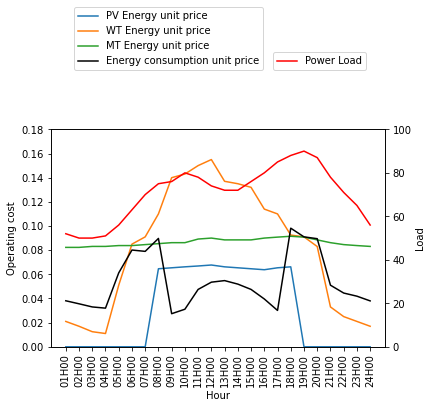

In [12]:
# Fig 5: The estimated operating cost, power load and the day profile costs per unit of distributed generators (PV and MT) without WT

x1 = data['Hour']
y1 = data['PV_cost']
y2 = data['WT_cost']
y3 = data['MT_cost']
y4 = data['Op_cost']
y5 = data['Pload']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, y1, '-', label="PV Energy unit price")
ax.plot(x1, y2, '-', label="WT Energy unit price")
ax.plot(x1, y3, '-', label="MT Energy unit price")
ax.plot(x1, y4, '-', label="Energy consumption unit price",color="black")

ax2 = ax.twinx()
ax2.plot(x1,y5, '-r', label="Power Load")
ax.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower right')
ax2.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower left')

ax.set_xticklabels(x1,rotation=90)
 
ax.set_xlabel("Hour")
ax.set_ylabel(r"Operating cost")
ax2.set_ylabel(r"Load")
 
# Setting Y limits
ax.set_ylim(0, 0.18)
ax2.set_ylim(0, 100)
 
plt.show()

In [13]:
# PV,WT without MT

def obj_func():
    dataset = pd.read_csv('MG_Hourly_data.csv',encoding='latin1')
    MT_Pmax = 30
    nsum=0
    sum=0
    Ui = 1
    l=[]
 
    peak = ["09H00","10H00","11H00","12H00","13H00","14H00","15H00","16H00","17H00"]
    for j in range(24):
        for i in range(1):
            if dataset['Hour'][j] in peak:
                Ui = 1
                sum1 = (Ui * dataset['PV_Pmax'][j] * dataset['PV_cost'][j]) 
                sum2 = (Ui * dataset['WT_Pmax'][j] * dataset['WT_cost'][j]) 
                # sum3 = (Ui * dataset['MT_cost'][j] *  MT_Pmax)
                sum3=0
            else:
                sum1 = 0
                sum2 = (Ui * dataset['WT_Pmax'][j] * dataset['WT_cost'][j]) 
                sum3 = (Ui * dataset['MT_cost'][j] *  MT_Pmax) 
            sum = sum1 + sum2 + sum3
        nsum +=  sum #operating cost
        l.append(sum)
    return l

In [14]:
data = pd.read_csv("MG_Hourly_data.csv")
data['Op_cost'] = obj_func()
data['Op_cost']=round((data['Op_cost']/100),4)

C:\Users\sjsha\AppData\Local\Temp/ipykernel_8044/2351360804.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1,rotation=90)


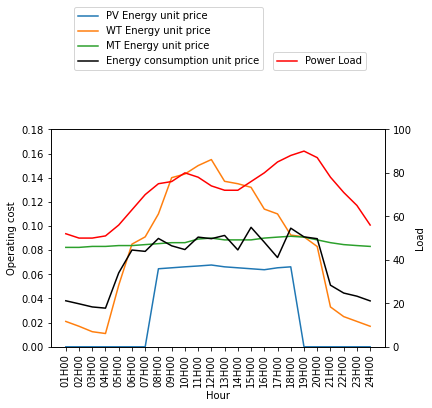

In [15]:
# Fig 6: The estimated operating cost, power load and the day profile costs per unit of distributed generators (PV and WT) without MT

x1 = data['Hour']
y1 = data['PV_cost']
y2 = data['WT_cost']
y3 = data['MT_cost']
y4 = data['Op_cost']
y5 = data['Pload']

fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(x1, y1, '-', label="PV Energy unit price")
ax.plot(x1, y2, '-', label="WT Energy unit price")
ax.plot(x1, y3, '-', label="MT Energy unit price")
ax.plot(x1, y4, '-', label="Energy consumption unit price",color="black")

ax2 = ax.twinx()
ax2.plot(x1,y5, '-r', label="Power Load")

ax.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower right')
ax2.legend(bbox_to_anchor = (0.65,1.25), loc = 'lower left')

ax.set_xticklabels(x1,rotation=90)

ax.set_xlabel("Hour")
ax.set_ylabel(r"Operating cost")
ax2.set_ylabel(r"Load")
ax.set_ylim(0, 0.18)
ax2.set_ylim(0, 100)

plt.show()

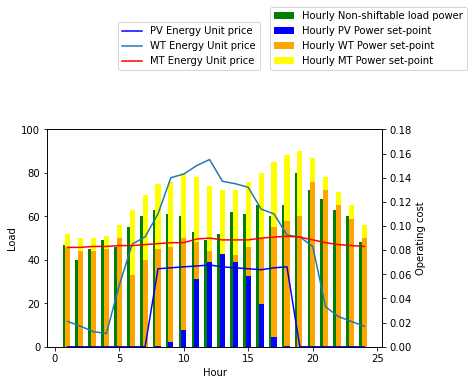

In [16]:
# Fig 7:Hourly dispatching set-points for non-shiftable load and unit prices

fig = plt.figure()

x = dataset['Hour']
z1 = dataset['PV_setpoint']
z2 = dataset['WT_setpoint']
z3 = dataset['MT_setpoint']
z4 = dataset['Non_shiftable']

ax = fig.add_subplot(111)
ax.bar(x-0.2, z4, width = 0.4, color='green')
ax.bar(x ,z1, width=0.4, color = 'blue')
ax.bar(x, z2, bottom=z1, width=0.4, color='orange')
ax.bar(x, z3, bottom=z1+z2, width=0.4, color='yellow')

y1 = data['PV_cost']
y2 = data['WT_cost']
y3 = data['MT_cost']

ax2 = ax.twinx()
ax2.plot(x, y1, '-', label="PV Energy unit price",color="blue")
ax2.plot(x, y2, '-', label="WT Energy unit price")
ax2.plot(x, y3, '-', label="MT Energy unit price",color="red")

ax.set_ylim(0, 100)
ax2.set_ylim(0, 0.18)
ax.set_xlabel("Hour")
ax.set_ylabel(r"Load")
ax2.set_ylabel(r"Operating cost")


ax.legend(["Hourly Non-shiftable load power", "Hourly PV Power set-point", "Hourly WT Power set-point","Hourly MT Power set-point"],bbox_to_anchor = (0.65,1.25), loc = 'lower left')
ax2.legend(["PV Energy Unit price","WT Energy Unit price","MT Energy Unit price"],bbox_to_anchor = (0.65,1.25), loc = 'lower right')
plt.show()

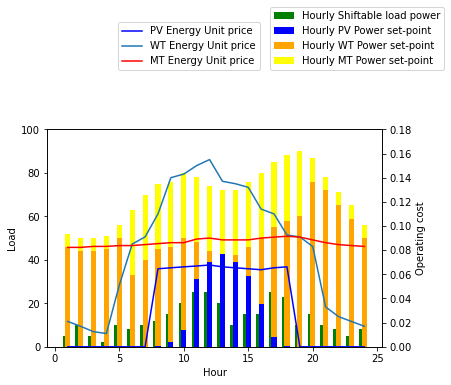

In [17]:
# Fig 8:Hourly dispatching set-points for Shiftable load and unit prices

fig = plt.figure()

x = dataset['Hour']
z1 = dataset['PV_setpoint']
z2 = dataset['WT_setpoint']
z3 = dataset['MT_setpoint']
z4 = dataset['Shiftable']

ax = fig.add_subplot(111)
ax.bar(x-0.2, z4, width = 0.4, color='green')
ax.bar(x ,z1, width=0.4, color = 'blue')
ax.bar(x, z2, bottom=z1, width=0.4, color='orange')
ax.bar(x, z3, bottom=z1+z2, width=0.4, color='yellow')

y1 = data['PV_cost']
y2 = data['WT_cost']
y3 = data['MT_cost']

ax2 = ax.twinx()
ax2.plot(x, y1, '-', label="PV Energy unit price",color="blue")
ax2.plot(x, y2, '-', label="WT Energy unit price")
ax2.plot(x, y3, '-', label="MT Energy unit price",color="red")

ax.set_ylim(0, 100)
ax2.set_ylim(0, 0.18)

ax.set_xlabel("Hour")
ax.set_ylabel(r"Load")
ax2.set_ylabel(r"Operating cost")

ax.legend(["Hourly Shiftable load power", "Hourly PV Power set-point", "Hourly WT Power set-point","Hourly MT Power set-point"],bbox_to_anchor = (0.65,1.25), loc = 'lower left')
ax2.legend(["PV Energy Unit price","WT Energy Unit price","MT Energy Unit price"],bbox_to_anchor = (0.65,1.25), loc = 'lower right')
plt.show()

In [ ]:
#Fig 9: Hourly scheduling of load satisfying Non –Shiftable parts

import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("Schedule_data.csv",encoding='latin1')
fig = plt.figure()

x = dataset['Hour']
z1 = dataset['Non_shiftable']
z2 = dataset['Used_PV']
z3 = dataset['Used_WT']
z4 = dataset['Used_MT']

ax = fig.add_subplot(111)
ax.bar(x-0.2, z1, width = 0.4, color='blue')
ax.bar(x ,z2, width=0.4, color = 'red')
ax.bar(x, z3, bottom=z2, width=0.4, color='aqua')
ax.bar(x, z4, bottom=z2+z3, width=0.4, color='pink')

ax.set_ylim(0, 100)
ax.set_xlabel("Hour")
ax.set_ylabel(r"Load")

ax.legend(["Hourly Non Shiftable load power", "Hourly Scheduled PV Power", "Hourly Scheduled WT Power","Hourly Scheduled MT Power"],bbox_to_anchor = (0.25,1.25), loc = 'lower left')
plt.show()

In [ ]:
# Fig 10: Day distribution of Shiftable load power and remaining generator’s power
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("Schedule_data.csv",encoding='latin1')
fig = plt.figure()

x = dataset['Hour']
z1 = dataset['Shiftable']
z2 = dataset['Av_PV']
z3 = dataset['Av_WT']
z4 = dataset['Av_MT']
ax = fig.add_subplot(111)
ax.bar(x-0.2, z1, width = 0.4, color='green')
ax.bar(x ,z2, width=0.4, color = 'blue')
ax.bar(x, z3, bottom=z2, width=0.4, color='red')
ax.bar(x, z4, bottom=z2+z3, width=0.4, color='yellow')

ax.set_ylim(0, 80)
ax.set_xlabel("Hour")
ax.set_ylabel(r"Load")

ax.legend(["Hourly Shiftable load power", "Hourly Available PV Power", "Hourly Available WT Power","Hourly Available MT Power"],bbox_to_anchor = (0.25,1.25), loc = 'lower left')
plt.show()